# 本周内容
### 1. 分进合击
### 2. 分分分
### 3. 进进进
### 4. 合合合
### 5. 数据感
**采用倒叙的方式进行学习**

In [2]:
import pandas as pd

## 1. 合合合
**用.agg的参数**

In [3]:
df = pd.read_csv("20春_pandas_week02_hurun_unicorn.tsv",encoding = "utf-8",sep = "\t")

agg = {"企业名称":"count","估值（亿人民币）":["sum","mean"],"成立年份":["max","min"],    
}
# 单组单列
# 第一种写法
data = df.groupby("行业").agg({"企业名称":"count"})
display(data.head())

,企业名称
行业,
3D印刷,3
云计算,44
人工智能,40
健康科技,27
共享经济,22


In [23]:
# 第二种写法
data2 = df.groupby("行业")[["企业名称"]].agg(["count"])
display(data2.head())

,企业名称
,count
行业,
3D印刷,3
云计算,44
人工智能,40
健康科技,27
共享经济,22


In [24]:
# 第三种写法
data3 = df.groupby("行业")[["企业名称"]].count()
display(data3.head())

,企业名称
行业,
3D印刷,3
云计算,44
人工智能,40
健康科技,27
共享经济,22


In [27]:
# 单组多列，多列同样的agg
df.groupby("国家")[["估值（亿人民币）","成立年份"]].agg(["min","max"]).head()

估值（亿人民币）         成立年份      
           min    max   min   max
国家                               
中国          70  10000  2000  2019
以色列         70    150  2002  2013
卢森堡         70     70  2014  2014
印度          70    700  2000  2017
印度尼西亚       70    700  2009  2012

In [29]:
# 单组多列，多列不同的agg
df.groupby("国家").agg({"企业名称":"count","估值（亿人民币）":["sum","mean"],"成立年份":["min","max"]}).head()

企业名称 估值（亿人民币）              成立年份      
      count      sum        mean   min   max
国家                                          
中国      206    54700  265.533981  2000  2019
以色列       7      730  104.285714  2002  2013
卢森堡       1       70   70.000000  2014  2014
印度       21     3850  183.333333  2000  2017
印度尼西亚     4     1570  392.500000  2009  2012

### agg总结
**agg的几种方式**   
```
1. df.groupby("某个变量").agg({"某个变量":["count","sum"]})
2. df.groupby("某个变量")[["某个变量","某个变量"]].agg(["max","min"])
3. df.groupby("某个变量")[["某个变量","某个变量"]].count()

```

## 2. 进进进
计算数据
**count,sum,mean,max,min**

In [51]:
from IPython.display import display, HTML
# 计算某一项的总和
print(df["估值（亿人民币）"].agg("sum"))
display(df[["城市","估值（亿人民币）"]]).groupby(by="城市").sum()

70


,城市,估值（亿人民币）
0,杭州,10000
1,北京,5000
2,北京,3600
3,纽约,3500
4,旧金山,3400
5,旧金山,2700
6,上海,2700
7,洛杉矶,2500
8,纽约,2100
9,旧金山,1600


AttributeError: 'NoneType' object has no attribute 'groupby'

In [32]:
display(df[["城市","估值（亿人民币）"]].groupby(by="城市").agg("sum"))

,估值（亿人民币）
城市,
-,370
Burlington Massachussets,150
Emerville,500
Foster City,200
Guilford,70
Harrisburg,500
Plantation,400
Stafford,70
上海,8990


In [43]:
df["成立年份"].agg(["max","min"])

max    2019
min    2000
Name: 成立年份, dtype: int64

In [46]:
df[["估值（亿人民币）"]].agg(["count","mean"])

,估值（亿人民币）,城市
count,494.000000,494.0
mean,238.805668,NaN


In [39]:
display(df[["国家","企业名称","成立年份"]].groupby(by="国家").max())

,企业名称,成立年份
国家,,
中国,麦奇教育科技,2019
以色列,ironSource,2013
卢森堡,Global Fashion Group,2014
印度,Zomato,2017
印度尼西亚,Traveloka,2012
哥伦比亚,Rappi,2016
巴西,iFood,2013
德国,Omio,2014
新加坡,Lazada,2012


In [41]:
display(df[["国家","企业名称","成立年份"]].groupby(by="国家").agg("max"))

,企业名称,成立年份
国家,,
中国,麦奇教育科技,2019
以色列,ironSource,2013
卢森堡,Global Fashion Group,2014
印度,Zomato,2017
印度尼西亚,Traveloka,2012
哥伦比亚,Rappi,2016
巴西,iFood,2013
德国,Omio,2014
新加坡,Lazada,2012


## 3. 分分分
**用groupby函数，数据切片**

In [56]:
# 切某一个层级
a = df.groupby("国家")
a

In [57]:
# 切多个层级
b = df.groupby(["国家","行业"])
b

In [58]:
# 观察数据类型，哪些可以切，哪些可以合
a.dtypes

,排名,企业名称,Company Name,估值（亿人民币）,城市,行业,掌门人/创始人,成立年份,部分投资机构
国家,,,,,,,,,
中国,int64,object,object,int64,object,object,object,int64,object
以色列,int64,object,object,int64,object,object,object,int64,object
卢森堡,int64,object,object,int64,object,object,object,int64,object
印度,int64,object,object,int64,object,object,object,int64,object
印度尼西亚,int64,object,object,int64,object,object,object,int64,object
哥伦比亚,int64,object,object,int64,object,object,object,int64,object
巴西,int64,object,object,int64,object,object,object,int64,object
德国,int64,object,object,int64,object,object,object,int64,object
新加坡,int64,object,object,int64,object,object,object,int64,object


In [59]:
b.dtypes

排名    企业名称 Company Name 估值（亿人民币）      城市 掌门人/创始人   成立年份  \
国家  行业                                                                    
中国  云计算      int64  object       object    int64  object  object  int64   
    人工智能     int64  object       object    int64  object  object  int64   
    健康科技     int64  object       object    int64  object  object  int64   
    共享经济     int64  object       object    int64  object  object  int64   
    区块链      int64  object       object    int64  object  object  int64   
    大数据      int64  object       object    int64  object  object  int64   
    媒体和娱乐    int64  object       object    int64  object  object  int64   
    房地产科技    int64  object       object    int64  object  object  int64   
    教育科技     int64  object       object    int64  object  object  int64   
    新能源      int64  object       object    int64  object  object  int64   
    新能源汽车    int64  object       object    int64  object  object  int64   
    新零售      int64  object       object    int64  object  object  int64   
    机器人      int64  object       object    int64  object  object  int64   
    消费品      int64  object       object    int64  object  object  int64   
    游戏       int64  object       object    int64  object  object  int64   
    物流       int64  object       object    int64  object  object  int64   
    生命科学     int64  object       object    int64  object  object  int64   
    电子商务     int64  object       object    int64  object  object  int64   
    网络安全     int64  object       object    int64  object  object  int64   
    软件与服务    int64  object       object    int64  object  object  int64   
    金融科技     int64  object       object    int64  object  object  int64   
以色列 云计算      int64  object       object    int64  object  object  int64   
    人工智能     int64  object       object    int64  object  object  int64   
    生命科学     int64  object       object    int64  object  object  int64   
    软件与服务    int64  object       object    int64  object  object  int64   
卢森堡 电子商务     int64  object       object    int64  object  object  int64   
印度  共享经济     int64  object       object    int64  object  object  int64   
    即时通讯     int64  object       object    int64  object  object  int64   
    大数据      int64  object       object    int64  object  object  int64   
    教育科技     int64  object       object    int64  object  object  int64   
...            ...     ...          ...      ...     ...     ...    ...   
美国  新能源      int64  object       object    int64  object  object  int64   
    新能源汽车    int64  object       object    int64  object  object  int64   
    新零售      int64  object       object    int64  object  object  int64   
    机器人      int64  object       object    int64  object  object  int64   
    消费品      int64  object       object    int64  object  object  int64   
    游戏       int64  object       object    int64  object  object  int64   
    物流       int64  object       object    int64  object  object  int64   
    生命科学     int64  object       object    int64  object  object  int64   
    电子商务     int64  object       object    int64  object  object  int64   
    网络安全     int64  object       object    int64  object  object  int64   
    航天       int64  object       object    int64  object  object  int64   
    虚拟与增强现实  int64  object       object    int64  object  object  int64   
    软件与服务    int64  object       object    int64  object  object  int64   
    金融科技     int64  object       object    int64  object  object  int64   
芬兰  消费品      int64  object       object    int64  object  object  int64   
英国  人工智能     int64  object       object    int64  object  object  int64   
    新能源      int64  object       object    int64  object  object  int64   
    游戏       int64  object       object    int64  object  object  int64   
    物流       int64  object       object    int64  object  object  int64   
    生命科学     int64  object       object    int64  object  object  int64   
    电子商务     int64  object       object  

In [60]:
b.mean()
# 只保留了int列，没有object列

排名    估值（亿人民币）         成立年份
国家  行业                                          
中国  云计算      230.800000   92.000000  2012.400000
    人工智能     189.333333  139.333333  2013.466667
    健康科技     206.538462  158.461538  2011.384615
    共享经济     148.750000  592.500000  2014.375000
    区块链      116.500000  312.500000  2014.000000
    大数据      250.666667   80.000000  2011.111111
    媒体和娱乐    151.647059  484.117647  2011.529412
    房地产科技    183.142857  191.428571  2012.571429
    教育科技     211.272727  108.181818  2010.181818
    新能源      264.000000   70.000000  2007.000000
    新能源汽车    168.500000  150.833333  2015.666667
    新零售      232.500000   90.000000  2013.500000
    机器人       98.666667  466.666667  2010.333333
    消费品      170.750000  155.000000  2014.750000
    游戏       224.000000  100.000000  2015.000000
    物流       182.125000  244.375000  2011.250000
    生命科学     209.000000  110.000000  2010.500000
    电子商务     209.424242  127.878788  2011.303030
    网络安全      84.000000  200.000000  2015.000000
    软件与服务    224.533333   97.333333  2010.400000
    金融科技     174.363636  816.363636  2012.136364
以色列 云计算      201.000000  110.000000  2011.500000
    人工智能     264.000000   70.000000  2010.000000
    生命科学     264.000000   70.000000  2010.000000
    软件与服务    138.000000  150.000000  2002.000000
卢森堡 电子商务     264.000000   70.000000  2014.000000
印度  共享经济     119.000000  273.333333  2013.333333
    即时通讯     264.000000   70.000000  2012.000000
    大数据      138.000000  150.000000  2004.000000
    教育科技      43.000000  400.000000  2008.000000
...                 ...         ...          ...
美国  新能源      264.000000   70.000000  2007.800000
    新能源汽车    123.666667  240.000000  2012.666667
    新零售      243.000000   83.333333  2010.500000
    机器人       84.000000  200.000000  2016.000000
    消费品      173.000000  580.000000  2012.714286
    游戏       124.000000  194.000000  2008.000000
    物流       148.777778  256.666667  2012.888889
    生命科学     131.600000  266.000000  2011.500000
    电子商务     201.235294  155.294118  2011.411765
    网络安全     225.666667  141.666667  2010.833333
    航天       118.666667  923.333333  2006.666667
    虚拟与增强现实   50.000000  350.000000  2010.500000
    软件与服务    232.500000   90.000000  2010.500000
    金融科技     144.761905  239.047619  2010.952381
芬兰  消费品      264.000000   70.000000  2016.000000
英国  人工智能     138.000000  150.000000  2014.500000
    新能源      264.000000   70.000000  2009.000000
    游戏       138.000000  150.000000  2012.000000
    物流       138.000000  150.000000  2012.000000
    生命科学     138.000000  150.000000  2005.000000
    电子商务      50.000000  350.000000  2004.000000
    金融科技      97.333333  208.333333  2012.833333
菲律宾 房地产科技    264.000000   70.000000  2015.000000
西班牙 共享经济     264.000000   70.000000  2011.000000
阿根廷 云计算      264.000000   70.000000  2013.000000
韩国  游戏        50.000000  350.000000  2007.000000
    物流        84.000000  200.000000  2011.000000
    电子商务     184.333333  246.666667  2008.333333
    金融科技     264.000000   70.000000  2011.000000
马耳他 区块链      138.000000  150.000000  2017.000000

[103 rows x 3 columns]

In [61]:
a.groups
# groups是groupby的是一个属性，是一个字典

{'中国': Int64Index([  0,   1,   2,   6,  10,  11,  12,  13,  14,  19,
             ...
             481, 482, 483, 484, 485, 486, 487, 488, 490, 491],
            dtype='int64', length=206),
 '以色列': Int64Index([178, 184, 190, 310, 364, 384, 415], dtype='int64'),
 '卢森堡': Int64Index([342], dtype='int64'),
 '印度': Int64Index([ 23,  42,  45,  52,  81, 113, 123, 146, 163, 192, 206, 287, 323,
             347, 361, 410, 422, 425, 432, 437, 465],
            dtype='int64'),
 '印度尼西亚': Int64Index([22, 39, 74, 294], dtype='int64'),
 '哥伦比亚': Int64Index([427], dtype='int64'),
 '巴西': Int64Index([66, 344, 358, 389], dtype='int64'),
 '德国': Int64Index([56, 108, 160, 169, 269, 339, 411], dtype='int64'),
 '新加坡': Int64Index([15, 50], dtype='int64'),
 '日本': Int64Index([202, 388], dtype='int64'),
 '法国': Int64Index([149, 317, 320, 396], dtype='int64'),
 '澳大利亚': Int64Index([88], dtype='int64'),
 '爱尔兰': Int64Index([182], dtype='int64'),
 '爱沙尼亚': Int64Index([290], dtype='int64'),
 '瑞典': Int64Index([62, 196], dty

In [62]:
b.groups

{('中国', '云计算'): Int64Index([183, 251, 325, 464, 467], dtype='int64'),
 ('中国',
  '人工智能'): Int64Index([46, 63, 91, 102, 153, 218, 241, 255, 267, 285, 337, 401, 402, 403,
             414],
            dtype='int64'),
 ('中国',
  '健康科技'): Int64Index([27, 48, 77, 234, 245, 279, 305, 326, 345, 356, 380, 398, 454], dtype='int64'),
 ('中国',
  '共享经济'): Int64Index([2, 47, 99, 127, 224, 254, 378, 438], dtype='int64'),
 ('中国', '区块链'): Int64Index([19, 87, 150, 226], dtype='int64'),
 ('中国',
  '大数据'): Int64Index([232, 244, 250, 321, 338, 352, 372, 385, 451], dtype='int64'),
 ('中国',
  '媒体和娱乐'): Int64Index([1, 13, 85, 93, 95, 101, 132, 154, 214, 220, 235, 242, 260, 275,
             387, 392, 482],
            dtype='int64'),
 ('中国', '房地产科技'): Int64Index([24, 80, 225, 240, 259, 332, 468], dtype='int64'),
 ('中国',
  '教育科技'): Int64Index([128, 134, 136, 229, 265, 313, 353, 354, 365, 377, 490], dtype='int64'),
 ('中国', '新能源'): Int64Index([328, 423], dtype='int64'),
 ('中国',
  '新能源汽车'): Int64Index([78, 79, 120, 

## 4. 分进合击
1. 分进合击——剑法：   
   * 分 groupby   
   * 进 count,mean,max,min,sum   
   * 合 agg   
2. 分进合击——科技心法   
   * 分 split   
   * 进 apply   
   * 合 combine   
3. 出报表——剑法   
   * rename改名:修改列名称/索引名称   
   * sort_values排序
   * excel多分页法：with pd.ExcelWriter() as writer:/with open() as fp:

In [8]:
country_first = df.groupby(by = ["国家","行业"]) \
                  .agg({"企业名称":"count","估值（亿人民币）":["sum","mean"], "成立年份":["min","max"],}) \
                  .sort_values(by=[("估值（亿人民币）","sum")],ascending = False) \
                  .rename(columns = {"sum":"总和","mean":"均值","count":"数量","max":"最新","min":"最早"})
display(country_first)

企业名称 估值（亿人民币）               成立年份      
               数量       总和           均值    最早    最新
国家   行业                                            
中国   金融科技      22    17960   816.363636  2002  2018
     媒体和娱乐     17     8230   484.117647  2003  2015
美国   云计算       32     6880   215.000000  2000  2015
     共享经济       6     5670   945.000000  2008  2017
     金融科技      21     5020   239.047619  2000  2017
中国   共享经济       8     4740   592.500000  2011  2016
     电子商务      33     4220   127.878788  2005  2015
美国   消费品        7     4060   580.000000  2006  2017
中国   物流        16     3910   244.375000  2000  2015
美国   人工智能      20     3080   154.000000  2003  2016
     航天         3     2770   923.333333  2002  2012
     生命科学      10     2660   266.000000  2006  2016
     电子商务      17     2640   155.294118  2007  2017
     物流         9     2310   256.666667  2010  2015
中国   人工智能      15     2090   139.333333  2009  2016
     健康科技      13     2060   158.461538  2000  2019
美国   大数据        8     1850   231.250000  2001  2013
中国   新能源汽车     12     1810   150.833333  2014  2017
美国   媒体和娱乐      6     1720   286.666667  2003  2014
     健康科技      12     1550   129.166667  2001  2017
中国   软件与服务     15     1460    97.333333  2001  2014
     机器人        3     1400   466.666667  2006  2013
     房地产科技      7     1340   191.428571  2010  2018
英国   金融科技       6     1250   208.333333  2011  2015
中国   区块链        4     1250   312.500000  2013  2017
     教育科技      11     1190   108.181818  2001  2014
美国   区块链        4     1170   292.500000  2011  2013
新加坡  共享经济       1     1000  1000.000000  2012  2012
美国   游戏         5      970   194.000000  2004  2012
印度   金融科技       3      920   306.666667  2000  2010
...           ...      ...          ...   ...   ...
以色列  软件与服务      1      150   150.000000  2002  2002
瑞士   区块链        1      150   150.000000  2015  2015
日本   人工智能       1      150   150.000000  2014  2014
印度   大数据        1      150   150.000000  2004  2004
爱尔兰  云计算        1      150   150.000000  2000  2000
瑞典   新能源        1      150   150.000000  2016  2016
中国   新能源        2      140    70.000000  2006  2008
巴西   物流         2      140    70.000000  2011  2013
中国   游戏         1      100   100.000000  2015  2015
以色列  人工智能       1       70    70.000000  2010  2010
印度   即时通讯       1       70    70.000000  2012  2012
阿根廷  云计算        1       70    70.000000  2013  2013
西班牙  共享经济       1       70    70.000000  2011  2011
菲律宾  房地产科技      1       70    70.000000  2015  2015
以色列  生命科学       1       70    70.000000  2010  2010
韩国   金融科技       1       70    70.000000  2011  2011
卢森堡  电子商务       1       70    70.000000  2014  2014
瑞士   虚拟与增强现实    1       70    70.000000  2012  2012
印度   新零售        1       70    70.000000  2011  2011
英国   新能源        1       70    70.000000  2009  2009
芬兰   消费品        1       70    70.000000  2016  2016
印度   游戏         1       70    70.000000  2012  2012
     软件与服务      1       70    70.000000  2007  2007
哥伦比亚 物流         1       70    70.000000  2016  2016
巴西   健康科技       1       70    70.000000  2012  2012
日本   区块链        1       70    70.000000  2014  2014
法国   人工智能       1       70    70.000000  2016  2016
     媒体和娱乐      1       70    70.000000  2006  2006
爱沙尼亚 共享经济       1       70    70.000000  2013  2013
法国   健康科技       1       70    70.000000  2013  2013

[103 rows x 5 columns]

In [6]:
vary_first = df.groupby(by = ["行业","国家"]) \
                  .agg({"企业名称":"count","估值（亿人民币）":["sum","mean"], "成立年份":["min","max"],}) \
                  .sort_values(by=[("估值（亿人民币）","sum")],ascending = False) \
                  .rename(columns = {"sum":"总和","mean":"均值","count":"数量","max":"最新","min":"最早"})
display(vary_first)

企业名称 估值（亿人民币）               成立年份      
               数量       总和           均值    最早    最新
行业      国家                                         
金融科技    中国     22    17960   816.363636  2002  2018
媒体和娱乐   中国     17     8230   484.117647  2003  2015
云计算     美国     32     6880   215.000000  2000  2015
共享经济    美国      6     5670   945.000000  2008  2017
金融科技    美国     21     5020   239.047619  2000  2017
共享经济    中国      8     4740   592.500000  2011  2016
电子商务    中国     33     4220   127.878788  2005  2015
消费品     美国      7     4060   580.000000  2006  2017
物流      中国     16     3910   244.375000  2000  2015
人工智能    美国     20     3080   154.000000  2003  2016
航天      美国      3     2770   923.333333  2002  2012
生命科学    美国     10     2660   266.000000  2006  2016
电子商务    美国     17     2640   155.294118  2007  2017
物流      美国      9     2310   256.666667  2010  2015
人工智能    中国     15     2090   139.333333  2009  2016
健康科技    中国     13     2060   158.461538  2000  2019
大数据     美国      8     1850   231.250000  2001  2013
新能源汽车   中国     12     1810   150.833333  2014  2017
媒体和娱乐   美国      6     1720   286.666667  2003  2014
健康科技    美国     12     1550   129.166667  2001  2017
软件与服务   中国     15     1460    97.333333  2001  2014
机器人     中国      3     1400   466.666667  2006  2013
房地产科技   中国      7     1340   191.428571  2010  2018
金融科技    英国      6     1250   208.333333  2011  2015
区块链     中国      4     1250   312.500000  2013  2017
教育科技    中国     11     1190   108.181818  2001  2014
区块链     美国      4     1170   292.500000  2011  2013
共享经济    新加坡     1     1000  1000.000000  2012  2012
游戏      美国      5      970   194.000000  2004  2012
金融科技    印度      3      920   306.666667  2000  2010
...           ...      ...          ...   ...   ...
生命科学    德国      1      150   150.000000  2000  2000
大数据     印度      1      150   150.000000  2004  2004
软件与服务   以色列     1      150   150.000000  2002  2002
游戏      英国      1      150   150.000000  2012  2012
区块链     马耳他     1      150   150.000000  2017  2017
人工智能    日本      1      150   150.000000  2014  2014
新能源     中国      2      140    70.000000  2006  2008
物流      巴西      2      140    70.000000  2011  2013
游戏      中国      1      100   100.000000  2015  2015
软件与服务   印度      1       70    70.000000  2007  2007
人工智能    以色列     1       70    70.000000  2010  2010
云计算     阿根廷     1       70    70.000000  2013  2013
人工智能    法国      1       70    70.000000  2016  2016
虚拟与增强现实 瑞士      1       70    70.000000  2012  2012
新零售     印度      1       70    70.000000  2011  2011
电子商务    卢森堡     1       70    70.000000  2014  2014
健康科技    巴西      1       70    70.000000  2012  2012
        法国      1       70    70.000000  2013  2013
共享经济    爱沙尼亚    1       70    70.000000  2013  2013
        西班牙     1       70    70.000000  2011  2011
区块链     日本      1       70    70.000000  2014  2014
新能源     英国      1       70    70.000000  2009  2009
即时通讯    印度      1       70    70.000000  2012  2012
生命科学    以色列     1       70    70.000000  2010  2010
媒体和娱乐   法国      1       70    70.000000  2006  2006
房地产科技   菲律宾     1       70    70.000000  2015  2015
物流      哥伦比亚    1       70    70.000000  2016  2016
游戏      印度      1       70    70.000000  2012  2012
消费品     芬兰      1       70    70.000000  2016  2016
金融科技    韩国      1       70    70.000000  2011  2011

[103 rows x 5 columns]

In [74]:
# excel多分页法：
with pd.ExcelWriter("练习excel分页.xlsx") as writer:
    country_first.to_excel(writer,sheet_name="country_first")
    vary_first.to_excel(writer,sheet_name="vary_first")

In [9]:
# 先行后城和先国后城
先行后城 = df.groupby(by = ["行业","城市"]) \
             .agg({"企业名称":"count","估值（亿人民币）":["sum","mean"],"成立年份":["min","max"]}) \
             .sort_values(by = [("估值（亿人民币）","mean")],ascending = False) \
             .rename(columns = {"sum":"总和","mean":"均值","count":"数量","min":"最早","max":"最新"})
先国后城 = df.groupby(by = ["国家","城市"]) \
             .agg({"企业名称":"count","估值（亿人民币）":["sum","mean"],"成立年份":["min","max"]}) \
             .sort_values(by = [("估值（亿人民币）","mean")],ascending = False) \
             .rename(columns = {"sum":"总和","mean":"均值","count":"数量","min":"最早","max":"最新"})
display(先行后城)
display(先国后城)

with pd.ExcelWriter("练习excel分页.xlsx") as writer:
    先行后城.to_excel(writer,sheet_name="先行后城")
    先国后城.to_excel(writer,sheet_name="先国后城")

企业名称 估值（亿人民币）               成立年份      
                     数量       总和           均值    最早    最新
行业      城市                                               
金融科技    杭州            4    10290  2572.500000  2009  2015
航天      洛杉矶           1     2500  2500.000000  2002  2002
共享经济    纽约            1     2100  2100.000000  2010  2010
消费品     旧金山           2     3550  1775.000000  2015  2017
共享经济    旧金山           2     2770  1385.000000  2008  2009
物流      杭州            1     1300  1300.000000  2013  2013
媒体和娱乐   洛杉矶           1     1000  1000.000000  2007  2007
大数据     帕洛阿尔托         1     1000  1000.000000  2004  2004
共享经济    新加坡           1     1000  1000.000000  2012  2012
云计算     纽约            4     3950   987.500000  2002  2011
媒体和娱乐   北京            7     6890   984.285714  2003  2013
金融科技    上海            4     3470   867.500000  2002  2015
共享经济    北京            5     4040   808.000000  2011  2016
区块链     北京            1      800   800.000000  2013  2013
共享经济    雅加达           1      700   700.000000  2010  2010
金融科技    诺伊达           1      700   700.000000  2010  2010
机器人     深圳            2     1300   650.000000  2006  2012
房地产科技   天津            1      600   600.000000  2018  2018
金融科技    门洛帕克          1      550   550.000000  2013  2013
生命科学    门洛帕克          1      550   550.000000  2016  2016
金融科技    深圳            3     1640   546.666667  2014  2016
共享经济    匹兹堡           1      500   500.000000  2015  2015
人工智能    Harrisburg    1      500   500.000000  2016  2016
生命科学    巴塞尔           1      500   500.000000  2014  2014
金融科技    南京            1      500   500.000000  2006  2006
网络安全    Emerville     1      500   500.000000  2007  2007
生命科学    圣地亚哥          2      870   435.000000  2008  2013
虚拟与增强现实 Plantation    1      400   400.000000  2011  2011
教育科技    班加罗尔          1      400   400.000000  2008  2008
物流      贵阳            1      400   400.000000  2014  2014
...                 ...      ...          ...   ...   ...
生命科学    北京            2      140    70.000000  2007  2011
健康科技    Guilford      1       70    70.000000  2011  2011
人工智能    雷德伍德城         1       70    70.000000  2009  2009
生命科学    普莱森顿          1       70    70.000000  2012  2012
人工智能    耶路撒冷          1       70    70.000000  2010  2010
即时通讯    帕洛阿尔托         1       70    70.000000  2014  2014
生命科学    特拉维夫          1       70    70.000000  2010  2010
人工智能    深圳            1       70    70.000000  2013  2013
        波士顿           1       70    70.000000  2012  2012
        森尼维耳市         1       70    70.000000  2012  2012
电子商务    卢森堡           1       70    70.000000  2014  2014
        古尔冈           1       70    70.000000  2011  2011
健康科技    巴黎            1       70    70.000000  2013  2013
物流      西雅图           1       70    70.000000  2015  2015
健康科技    广州            1       70    70.000000  2015  2015
        旧金山           2      140    70.000000  2007  2012
物流      波哥大           1       70    70.000000  2016  2016
        圣保罗           2      140    70.000000  2011  2013
        半月湾           1       70    70.000000  2014  2014
共享经济    塔林            1       70    70.000000  2013  2013
游戏      波士顿           1       70    70.000000  2012  2012
        孟买            1       70    70.000000  2012  2012
共享经济    马德里           1       70    70.000000  2011  2011
区块链     东京            1       70    70.000000  2014  2014
消费品     赫尔辛基          1       70    70.000000  2016  2016
        纽约            2      140    70.000000  2014  2015
        圣塔莫尼卡         1       70    70.000000  2012  2012
        北京            1       70    70.000000  2014  2014
即时通讯    山景城           1       70    70.000000  2009  2009
金融科技    香港            2      140    70.000000  2013  2016

[298 rows x 5 columns]

企业名称 估值（亿人民币）               成立年份      
                    数量       总和           均值    最早    最新
国家    城市                                                
美国    洛杉矶            3     3570  1190.000000  2002  2010
中国    杭州            19    13290   699.473684  2000  2015
新加坡   新加坡            2     1350   675.000000  2012  2012
美国    Emerville      1      500   500.000000  2007  2007
瑞士    巴塞尔            1      500   500.000000  2014  2014
美国    Harrisburg     1      500   500.000000  2016  2016
      匹兹堡            1      500   500.000000  2015  2015
印度    诺伊达            2      900   450.000000  2010  2010
美国    门洛帕克           3     1300   433.333333  2013  2016
      Plantation     1      400   400.000000  2011  2011
中国    贵阳             1      400   400.000000  2014  2014
印度尼西亚 雅加达            4     1570   392.500000  2009  2012
中国    天津             3     1100   366.666667  2013  2018
美国    普利茅斯           1      350   350.000000  2009  2009
英国    曼彻斯特           1      350   350.000000  2004  2004
韩国    城南市            1      350   350.000000  2007  2007
美国    纽约            25     8640   345.600000  2002  2015
      旧金山           55    17060   310.181818  2004  2017
      加迪纳            1      300   300.000000  2014  2014
      达拉斯            1      300   300.000000  2010  2010
      帕洛阿尔托         10     2740   274.000000  2004  2016
中国    北京            81    22130   273.209877  2001  2019
      深圳            17     4440   261.176471  2006  2018
美国    圣地亚哥           4     1010   252.500000  2008  2016
瑞典    斯德哥尔摩          2      450   225.000000  2005  2016
美国    坎布里奇           2      450   225.000000  2013  2014
      圣马特奥           3      650   216.666667  2004  2017
韩国    首尔             5     1010   202.000000  2005  2011
美国    Foster City    1      200   200.000000  2014  2014
澳大利亚  悉尼             1      200   200.000000  2012  2012
...                ...      ...          ...   ...   ...
美国    阿拉米达           1       70    70.000000  2011  2011
中国    无锡             1       70    70.000000  2010  2010
美国    罗利             1       70    70.000000  2011  2011
菲律宾   马卡迪            1       70    70.000000  2015  2015
芬兰    赫尔辛基           1       70    70.000000  2016  2016
以色列   耐斯兹敖那          1       70    70.000000  2010  2010
中国    金华             1       70    70.000000  2017  2017
美国    盐湖城            1       70    70.000000  2008  2008
      Guilford       1       70    70.000000  2011  2011
爱沙尼亚  塔林             1       70    70.000000  2013  2013
美国    Stafford       1       70    70.000000  2006  2006
      克利尔沃特          1       70    70.000000  2010  2010
德国    汉堡             1       70    70.000000  2014  2014
美国    哥伦布            1       70    70.000000  2015  2015
      圣克拉拉           2      140    70.000000  2005  2012
      圣卡洛斯           1       70    70.000000  2001  2001
哥伦比亚  波哥大            1       70    70.000000  2016  2016
印度    新德里            1       70    70.000000  2012  2012
美国    坎贝尔            1       70    70.000000  2007  2007
      埃尔塞贡多          1       70    70.000000  2010  2010
      夏洛特市           2      140    70.000000  2000  2011
印度    孟买             1       70    70.000000  2012  2012
美国    尔湾             1       70    70.000000  2013  2013
卢森堡   卢森堡            1       70    70.000000  2014  2014
美国    底特律            1       70    70.000000  2015  2015
以色列   耶路撒冷           2      140    70.000000  2010  2013
瑞士    洛桑市            1       70    70.000000  2012  2012
美国    普莱森顿           1       70    70.000000  2012  2012
      杭廷顿海滩          1       70    70.000000  2006  2006
      半月湾            1       70    70.000000  2014  2014

[121 rows x 5 columns]

In [10]:
先国后城_2 = df.groupby(by = ["国家","城市"]) \
             .agg({"成立年份":["min","max"],"企业名称":"count","估值（亿人民币）":["sum","mean"]}) \
             .sort_values(by = [("估值（亿人民币）","mean")],ascending = False) \
             .rename(columns = {"sum":"总和","mean":"均值","count":"数量","min":"最早","max":"最新"})
display(先国后城_2)

成立年份       企业名称 估值（亿人民币）             
                     最早    最新   数量       总和           均值
国家    城市                                                
美国    洛杉矶          2002  2010    3     3570  1190.000000
中国    杭州           2000  2015   19    13290   699.473684
新加坡   新加坡          2012  2012    2     1350   675.000000
美国    Emerville    2007  2007    1      500   500.000000
瑞士    巴塞尔          2014  2014    1      500   500.000000
美国    Harrisburg   2016  2016    1      500   500.000000
      匹兹堡          2015  2015    1      500   500.000000
印度    诺伊达          2010  2010    2      900   450.000000
美国    门洛帕克         2013  2016    3     1300   433.333333
      Plantation   2011  2011    1      400   400.000000
中国    贵阳           2014  2014    1      400   400.000000
印度尼西亚 雅加达          2009  2012    4     1570   392.500000
中国    天津           2013  2018    3     1100   366.666667
美国    普利茅斯         2009  2009    1      350   350.000000
英国    曼彻斯特         2004  2004    1      350   350.000000
韩国    城南市          2007  2007    1      350   350.000000
美国    纽约           2002  2015   25     8640   345.600000
      旧金山          2004  2017   55    17060   310.181818
      加迪纳          2014  2014    1      300   300.000000
      达拉斯          2010  2010    1      300   300.000000
      帕洛阿尔托        2004  2016   10     2740   274.000000
中国    北京           2001  2019   81    22130   273.209877
      深圳           2006  2018   17     4440   261.176471
美国    圣地亚哥         2008  2016    4     1010   252.500000
瑞典    斯德哥尔摩        2005  2016    2      450   225.000000
美国    坎布里奇         2013  2014    2      450   225.000000
      圣马特奥         2004  2017    3      650   216.666667
韩国    首尔           2005  2011    5     1010   202.000000
美国    Foster City  2014  2014    1      200   200.000000
澳大利亚  悉尼           2012  2012    1      200   200.000000
...                 ...   ...  ...      ...          ...
美国    阿拉米达         2011  2011    1       70    70.000000
中国    无锡           2010  2010    1       70    70.000000
美国    罗利           2011  2011    1       70    70.000000
菲律宾   马卡迪          2015  2015    1       70    70.000000
芬兰    赫尔辛基         2016  2016    1       70    70.000000
以色列   耐斯兹敖那        2010  2010    1       70    70.000000
中国    金华           2017  2017    1       70    70.000000
美国    盐湖城          2008  2008    1       70    70.000000
      Guilford     2011  2011    1       70    70.000000
爱沙尼亚  塔林           2013  2013    1       70    70.000000
美国    Stafford     2006  2006    1       70    70.000000
      克利尔沃特        2010  2010    1       70    70.000000
德国    汉堡           2014  2014    1       70    70.000000
美国    哥伦布          2015  2015    1       70    70.000000
      圣克拉拉         2005  2012    2      140    70.000000
      圣卡洛斯         2001  2001    1       70    70.000000
哥伦比亚  波哥大          2016  2016    1       70    70.000000
印度    新德里          2012  2012    1       70    70.000000
美国    坎贝尔          2007  2007    1       70    70.000000
      埃尔塞贡多        2010  2010    1       70    70.000000
      夏洛特市         2000  2011    2      140    70.000000
印度    孟买           2012  2012    1       70    70.000000
美国    尔湾           2013  2013    1       70    70.000000
卢森堡   卢森堡          2014  2014    1       70    70.000000
美国    底特律          2015  2015    1       70    70.000000
以色列   耶路撒冷         2010  2013    2      140    70.000000
瑞士    洛桑市          2012  2012    1       70    70.000000
美国    普莱森顿         2012  2012    1       70    70.000000
      杭廷顿海滩        2006  2006    1       70    70.000000
      半月湾          2014  2014    1       70    70.000000

[121 rows x 5 columns]

## 5. 数据感

### （1）pandas类别数据：categorical

In [11]:
# pandas类别数据：categorical，使变量类型不再是object
print(df.国家.astype('category'))
# astype（）可用于转化dataframe某一列的数据类型

0         中国
1         中国
2         中国
3         美国
4         美国
5         美国
6         中国
7         美国
8         美国
9         美国
10        中国
11        中国
12        中国
13        中国
14        中国
15       新加坡
16        美国
17        美国
18        美国
19        中国
20        中国
21        美国
22     印度尼西亚
23        印度
24        中国
25        中国
26        韩国
27        中国
28        美国
29        美国
       ...  
464       中国
465       印度
466       美国
467       中国
468       中国
469       美国
470       美国
471       美国
472       美国
473       中国
474       美国
475       中国
476       中国
477       中国
478       中国
479       韩国
480       中国
481       中国
482       中国
483       中国
484       中国
485       中国
486       中国
487       中国
488       中国
489       美国
490       中国
491       中国
492       美国
493       美国
Name: 国家, Length: 494, dtype: category
Categories (24, object): [中国, 以色列, 卢森堡, 印度, ..., 西班牙, 阿根廷, 韩国, 马耳他]


中国         AxesSubplot(0.1,0.15;0.363636x0.75)
美国    AxesSubplot(0.536364,0.15;0.363636x0.75)
dtype: object

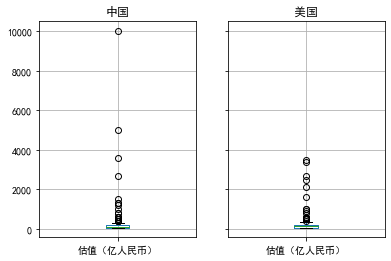

In [13]:
%matplotlib inline
import matplotlib as mpl  
mpl.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签  
mpl.rcParams['axes.unicode_minus']=False #用来正常显示负号 

df[df.国家.isin(["中国","美国"])][['国家',"估值（亿人民币）"]].groupby ( by = '国家' ).boxplot()
# isin()可用来清洗数据，用来过滤dataframe的某些行
# boxplot 箱型图/盒图

中国         AxesSubplot(0.1,0.15;0.363636x0.75)
美国    AxesSubplot(0.536364,0.15;0.363636x0.75)
dtype: object

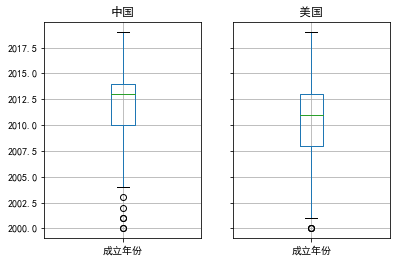

In [14]:
df[df.国家.isin(["中国","美国"])][["国家","成立年份"]].groupby(by="国家").boxplot()

In [18]:
city = df.groupby(by=["城市"]) \
         .agg({"企业名称" : "count", \
              "估值（亿人民币）":["sum","mean"], \
              "成立年份":["max","min"],}) \
             .sort_values ( by = [("估值（亿人民币）","sum")], ascending = False) \
             .rename ( columns = {"sum":"总和", "mean":"均值", "count":"数量", "max":"最新", "min":"最早"} )
display(city)

企业名称 估值（亿人民币）               成立年份      
            数量       总和           均值    最新    最早
城市                                              
北京          81    22130   273.209877  2019  2001
旧金山         55    17060   310.181818  2017  2004
杭州          19    13290   699.473684  2015  2000
上海          47     8990   191.276596  2017  2001
纽约          25     8640   345.600000  2015  2002
深圳          17     4440   261.176471  2018  2006
洛杉矶          3     3570  1190.000000  2010  2002
帕洛阿尔托       10     2740   274.000000  2016  2004
伦敦           9     1700   188.888889  2015  2011
雅加达          4     1570   392.500000  2012  2009
南京          11     1550   140.909091  2018  2006
班加罗尔         9     1500   166.666667  2017  2004
新加坡          2     1350   675.000000  2012  2012
门洛帕克         3     1300   433.333333  2016  2013
古尔冈          7     1160   165.714286  2014  2008
天津           3     1100   366.666667  2018  2013
圣地亚哥         4     1010   252.500000  2016  2008
首尔           5     1010   202.000000  2011  2005
广州           8     1000   125.000000  2017  2011
诺伊达          2      900   450.000000  2010  2010
雷德伍德城        9      870    96.666667  2014  2000
波士顿          8      820   102.500000  2013  2001
山景城          6      660   110.000000  2015  2006
圣马特奥         3      650   216.666667  2017  2004
柏林           4      640   160.000000  2013  2009
芝加哥          4      570   142.500000  2015  2012
圣保罗          4      510   127.500000  2013  2011
匹兹堡          1      500   500.000000  2015  2015
巴塞尔          1      500   500.000000  2014  2014
Emerville    1      500   500.000000  2007  2007
...        ...      ...          ...   ...   ...
贝尔维尤         1       70    70.000000  2011  2011
赫尔辛基         1       70    70.000000  2016  2016
阿拉米达         1       70    70.000000  2011  2011
迈阿密          1       70    70.000000  2013  2013
Stafford     1       70    70.000000  2006  2006
卢森堡          1       70    70.000000  2014  2014
苗必达          1       70    70.000000  2007  2007
耐斯兹敖那        1       70    70.000000  2010  2010
孟买           1       70    70.000000  2012  2012
尔湾           1       70    70.000000  2013  2013
塔林           1       70    70.000000  2013  2013
布宜诺斯艾利斯      1       70    70.000000  2013  2013
埃尔塞贡多        1       70    70.000000  2010  2010
底特律          1       70    70.000000  2015  2015
坎贝尔          1       70    70.000000  2007  2007
新德里          1       70    70.000000  2012  2012
无锡           1       70    70.000000  2010  2010
圣卡洛斯         1       70    70.000000  2001  2001
普莱森顿         1       70    70.000000  2012  2012
杭廷顿海滩        1       70    70.000000  2006  2006
桐乡           1       70    70.000000  2014  2014
哥伦布          1       70    70.000000  2015  2015
汉堡           1       70    70.000000  2014  2014
波哥大          1       70    70.000000  2016  2016
台北           1       70    70.000000  2006  2006
洛桑市          1       70    70.000000  2012  2012
盐湖城          1       70    70.000000  2008  2008
半月湾          1       70    70.000000  2014  2014
罗利           1       70    70.000000  2011  2011
马德里          1       70    70.000000  2011  2011

[120 rows x 5 columns]

In [19]:
city.index[0:5]

Index(['北京', '旧金山', '杭州', '上海', '纽约'], dtype='object', name='城市')

上海          AxesSubplot(0.1,0.679412;0.363636x0.220588)
北京     AxesSubplot(0.536364,0.679412;0.363636x0.220588)
旧金山         AxesSubplot(0.1,0.414706;0.363636x0.220588)
杭州     AxesSubplot(0.536364,0.414706;0.363636x0.220588)
纽约              AxesSubplot(0.1,0.15;0.363636x0.220588)
dtype: object

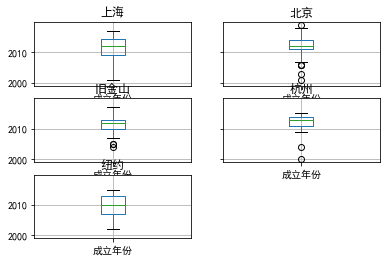

In [21]:
df[df.城市.isin(city.index[0:5])][["城市","成立年份"]].groupby(by="城市").boxplot()

In [24]:
new_df = df.copy()
new_df = new_df.assign(国家=df.国家.astype('category'))
new_df = new_df.assign(城市=df.城市.astype('category'))
new_df = new_df.assign(行业=df.行业.astype('category'))
new_df.info()
# assign 直接向dataframe对象添加新的一列
# 此时，国家、城市、行业的对象类型已经从object变成category

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494 entries, 0 to 493
Data columns (total 10 columns):
排名              494 non-null int64
企业名称            494 non-null object
Company Name    494 non-null object
估值（亿人民币）        494 non-null int64
国家              494 non-null category
城市              494 non-null category
行业              494 non-null category
掌门人/创始人         494 non-null object
成立年份            494 non-null int64
部分投资机构          494 non-null object
dtypes: category(3), int64(3), object(4)
memory usage: 36.1+ KB


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494 entries, 0 to 493
Data columns (total 10 columns):
排名              494 non-null int64
企业名称            494 non-null object
Company Name    494 non-null object
估值（亿人民币）        494 non-null int64
国家              494 non-null object
城市              494 non-null object
行业              494 non-null object
掌门人/创始人         494 non-null object
成立年份            494 non-null int64
部分投资机构          494 non-null object
dtypes: int64(3), object(7)
memory usage: 38.7+ KB


In [25]:
df.groupby("国家").sum().head()
# .sum()只筛选数据类型是int的列
# 此时国家是索引列

,排名,估值（亿人民币）,成立年份
国家,,,
中国,39407,54700,414473
以色列,1470,730,14068
卢森堡,264,70,2014
印度,3576,3850,42215
印度尼西亚,378,1570,8042


In [27]:
df.groupby("国家",as_index=False).sum().head()
# 此时国家不是索引列
# as_index=True时，没有显示索引项，而是以第一列为索引，这时不能用df.loc[]进行取值
# as_index=False时，显示索引项，可以用df.loc[]进行取值
# as_index的作用时控制聚合输出是否以组标签为索引值

,国家,排名,估值（亿人民币）,成立年份
0,中国,39407,54700,414473
1,以色列,1470,730,14068
2,卢森堡,264,70,2014
3,印度,3576,3850,42215
4,印度尼西亚,378,1570,8042


### (2)groupby 查询所有数据列的统计

In [30]:
df.groupby(['国家','行业']).mean()

排名    估值（亿人民币）         成立年份
国家  行业                                          
中国  云计算      230.800000   92.000000  2012.400000
    人工智能     189.333333  139.333333  2013.466667
    健康科技     206.538462  158.461538  2011.384615
    共享经济     148.750000  592.500000  2014.375000
    区块链      116.500000  312.500000  2014.000000
    大数据      250.666667   80.000000  2011.111111
    媒体和娱乐    151.647059  484.117647  2011.529412
    房地产科技    183.142857  191.428571  2012.571429
    教育科技     211.272727  108.181818  2010.181818
    新能源      264.000000   70.000000  2007.000000
    新能源汽车    168.500000  150.833333  2015.666667
    新零售      232.500000   90.000000  2013.500000
    机器人       98.666667  466.666667  2010.333333
    消费品      170.750000  155.000000  2014.750000
    游戏       224.000000  100.000000  2015.000000
    物流       182.125000  244.375000  2011.250000
    生命科学     209.000000  110.000000  2010.500000
    电子商务     209.424242  127.878788  2011.303030
    网络安全      84.000000  200.000000  2015.000000
    软件与服务    224.533333   97.333333  2010.400000
    金融科技     174.363636  816.363636  2012.136364
以色列 云计算      201.000000  110.000000  2011.500000
    人工智能     264.000000   70.000000  2010.000000
    生命科学     264.000000   70.000000  2010.000000
    软件与服务    138.000000  150.000000  2002.000000
卢森堡 电子商务     264.000000   70.000000  2014.000000
印度  共享经济     119.000000  273.333333  2013.333333
    即时通讯     264.000000   70.000000  2012.000000
    大数据      138.000000  150.000000  2004.000000
    教育科技      43.000000  400.000000  2008.000000
...                 ...         ...          ...
美国  新能源      264.000000   70.000000  2007.800000
    新能源汽车    123.666667  240.000000  2012.666667
    新零售      243.000000   83.333333  2010.500000
    机器人       84.000000  200.000000  2016.000000
    消费品      173.000000  580.000000  2012.714286
    游戏       124.000000  194.000000  2008.000000
    物流       148.777778  256.666667  2012.888889
    生命科学     131.600000  266.000000  2011.500000
    电子商务     201.235294  155.294118  2011.411765
    网络安全     225.666667  141.666667  2010.833333
    航天       118.666667  923.333333  2006.666667
    虚拟与增强现实   50.000000  350.000000  2010.500000
    软件与服务    232.500000   90.000000  2010.500000
    金融科技     144.761905  239.047619  2010.952381
芬兰  消费品      264.000000   70.000000  2016.000000
英国  人工智能     138.000000  150.000000  2014.500000
    新能源      264.000000   70.000000  2009.000000
    游戏       138.000000  150.000000  2012.000000
    物流       138.000000  150.000000  2012.000000
    生命科学     138.000000  150.000000  2005.000000
    电子商务      50.000000  350.000000  2004.000000
    金融科技      97.333333  208.333333  2012.833333
菲律宾 房地产科技    264.000000   70.000000  2015.000000
西班牙 共享经济     264.000000   70.000000  2011.000000
阿根廷 云计算      264.000000   70.000000  2013.000000
韩国  游戏        50.000000  350.000000  2007.000000
    物流        84.000000  200.000000  2011.000000
    电子商务     184.333333  246.666667  2008.333333
    金融科技     264.000000   70.000000  2011.000000
马耳他 区块链      138.000000  150.000000  2017.000000

[103 rows x 3 columns]

In [33]:
# 同时查看多种数据
df.groupby("国家").agg(["sum","mean","min","max"]).head()

排名                       估值（亿人民币）                           成立年份  \
         sum        mean  min  max      sum        mean min    max     sum   
国家                                                                           
中国     39407  191.296117    1  264    54700  265.533981  70  10000  414473   
以色列     1470  210.000000  138  264      730  104.285714  70    150   14068   
卢森堡      264  264.000000  264  264       70   70.000000  70     70    2014   
印度      3576  170.285714   23  264     3850  183.333333  70    700   42215   
印度尼西亚    378   94.500000   23  264     1570  392.500000  70    700    8042   

                                
              mean   min   max  
国家                              
中国     2012.004854  2000  2019  
以色列    2009.714286  2002  2013  
卢森堡    2014.000000  2014  2014  
印度     2010.238095  2000  2017  
印度尼西亚  2010.500000  2009  2012

In [34]:
# 筛选查看我们想要的数据
df.groupby("国家")[["估值（亿人民币）"]].agg(["sum","mean"]).head()

估值（亿人民币）            
           sum        mean
国家                        
中国       54700  265.533981
以色列        730  104.285714
卢森堡         70   70.000000
印度        3850  183.333333
印度尼西亚     1570  392.500000

In [35]:
df.groupby("国家")[["成立年份"]].agg(["min","max"]).head()

成立年份      
        min   max
国家               
中国     2000  2019
以色列    2002  2013
卢森堡    2014  2014
印度     2000  2017
印度尼西亚  2009  2012

### (3)groupby排序

In [38]:
# sort
# sort=True(排序)/False
df.groupby(["国家","行业"],sort=False).agg(["sum","count"])["估值（亿人民币）"]

sum  count
国家    行业                   
中国    金融科技     17960     22
      媒体和娱乐     8230     17
      共享经济      4740      8
美国    云计算       6880     32
      消费品       4060      7
      共享经济      5670      6
      航天        2770      3
      金融科技      5020     21
中国    物流        3910     16
      机器人       1400      3
新加坡   共享经济      1000      1
美国    媒体和娱乐     1720      6
      大数据       1850      8
      物流        2310      9
中国    区块链       1250      4
美国    生命科学      2660     10
印度尼西亚 共享经济       700      1
印度    金融科技       920      3
中国    房地产科技     1340      7
      电子商务      4220     33
韩国    电子商务       740      3
中国    健康科技      2060     13
美国    电子商务      2640     17
      区块链       1170      4
      人工智能      3080     20
瑞士    生命科学       500      1
美国    网络安全       850      6
印度尼西亚 电子商务       870      3
印度    教育科技       400      1
美国    虚拟与增强现实    700      2
...              ...    ...
日本    人工智能       150      1
美国    软件与服务      360      4
印度    新能源        150      1
中国    游戏         100      1
      大数据        720      9
美国    教育科技       210      3
阿根廷   云计算         70      1
印度    新零售         70      1
爱沙尼亚  共享经济        70      1
西班牙   共享经济        70      1
美国    新能源        350      5
法国    媒体和娱乐       70      1
      健康科技        70      1
印度    游戏          70      1
中国    新能源        140      2
卢森堡   电子商务        70      1
巴西    健康科技        70      1
印度    即时通讯        70      1
芬兰    消费品         70      1
巴西    物流         140      2
印度    软件与服务       70      1
以色列   生命科学        70      1
日本    区块链         70      1
法国    人工智能        70      1
瑞士    虚拟与增强现实     70      1
以色列   人工智能        70      1
英国    新能源         70      1
哥伦比亚  物流          70      1
菲律宾   房地产科技       70      1
韩国    金融科技        70      1

[103 rows x 2 columns]

In [43]:
# sort_values()
df.groupby(["国家","行业"]).agg(["sum","count","mean"])["估值（亿人民币）"].sort_values(by="sum",ascending=False)
# ascending=True 为升序排列

sum  count         mean
国家   行业                                
中国   金融科技     17960     22   816.363636
     媒体和娱乐     8230     17   484.117647
美国   云计算       6880     32   215.000000
     共享经济      5670      6   945.000000
     金融科技      5020     21   239.047619
中国   共享经济      4740      8   592.500000
     电子商务      4220     33   127.878788
美国   消费品       4060      7   580.000000
中国   物流        3910     16   244.375000
美国   人工智能      3080     20   154.000000
     航天        2770      3   923.333333
     生命科学      2660     10   266.000000
     电子商务      2640     17   155.294118
     物流        2310      9   256.666667
中国   人工智能      2090     15   139.333333
     健康科技      2060     13   158.461538
美国   大数据       1850      8   231.250000
中国   新能源汽车     1810     12   150.833333
美国   媒体和娱乐     1720      6   286.666667
     健康科技      1550     12   129.166667
中国   软件与服务     1460     15    97.333333
     机器人       1400      3   466.666667
     房地产科技     1340      7   191.428571
英国   金融科技      1250      6   208.333333
中国   区块链       1250      4   312.500000
     教育科技      1190     11   108.181818
美国   区块链       1170      4   292.500000
新加坡  共享经济      1000      1  1000.000000
美国   游戏         970      5   194.000000
印度   金融科技       920      3   306.666667
...             ...    ...          ...
以色列  软件与服务      150      1   150.000000
瑞士   区块链        150      1   150.000000
日本   人工智能       150      1   150.000000
印度   大数据        150      1   150.000000
爱尔兰  云计算        150      1   150.000000
瑞典   新能源        150      1   150.000000
中国   新能源        140      2    70.000000
巴西   物流         140      2    70.000000
中国   游戏         100      1   100.000000
以色列  人工智能        70      1    70.000000
印度   即时通讯        70      1    70.000000
阿根廷  云计算         70      1    70.000000
西班牙  共享经济        70      1    70.000000
菲律宾  房地产科技       70      1    70.000000
以色列  生命科学        70      1    70.000000
韩国   金融科技        70      1    70.000000
卢森堡  电子商务        70      1    70.000000
瑞士   虚拟与增强现实     70      1    70.000000
印度   新零售         70      1    70.000000
英国   新能源         70      1    70.000000
芬兰   消费品         70      1    70.000000
印度   游戏          70      1    70.000000
     软件与服务       70      1    70.000000
哥伦比亚 物流          70      1    70.000000
巴西   健康科技        70      1    70.000000
日本   区块链         70      1    70.000000
法国   人工智能        70      1    70.000000
     媒体和娱乐       70      1    70.000000
爱沙尼亚 共享经济        70      1    70.000000
法国   健康科技        70      1    70.000000

[103 rows x 3 columns]